<h1>The analysis of a real-world phenomenon for Programming for Data Analysis.<h1>








##   Introductory remarks.


A data set shall be interpreted as a collection of statistical data which is usually included in a tabulated form. It is important to mention that most often, the columns correspond to the observed statistical characteristics and each row describes one observation from the sample. The matrix cell values describe the implementation of variable data in subsequent observations.


The purpose of this project is to research the data set and write documentation and code (in Python programming language) to investigate it. It`s important to mention that Data scientist can be interpreted as a process of experimentation and exploration to find answers. Therefore, data science pursues the various scientific method. The data science process includes steps particular to working with large, digital datasets. Before the real-world phenomenon was choose, every scientist needs to follow crucial steps:

- Determine the necessary data;
- Get the data;
- Clean and organize the data;
- Explore the data;
- Model the data;
- Communicate findings.

Every of each modeling and synthesise have to include the above steps of analysis. In this project three aspects are taken into account: data scope, variable relationships and data context. 



## Determine the necessary data.
In thisstate of affairs, it has been used the United States Cities Database (uscities.csv). This is up-to-date (November 18th 2020) database of United States cities and towns. 
The second set is the user_data.csv which includes information about my users, such as: education, age and location. As an example of a hypothesis which proofs that my data are neccesary to collect is a question: is there a correlation between a user’s location (rural or urban) and their age? Based on provided data, it can be defined what is rural and urban location as data sets don`t detrmine that information. 
Determination process helps to apporve or dispartove particular hypotesis and helps to define how much data are needed to collect. To do this, Sample size calculators (available online) are the best tools. They shows: Margin of error, Confidence level, Population size Likely sample proportion.
As data sets for this project have more than 200 entries, they met criertia.



## Get the data.
This project requires passive data collection, which means they are already exist. It uses data from the Simple Maps website contains a United States Cities database (the proper link has been included in the List of sourxes.). As it was mentioned above, the project requires to cross-reference of 2 provided data sets. The 2 files: uscities.csv and user_data.csv are attached to repository. 


## Clean and organize the data.





In [142]:
#importing relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 2 CSV files and create the DataFrames:
user_data = pd.read_csv("user_data.csv")
pop_data = pd.read_csv("pop_data.csv")

# becasue of Panda library the set can be transform to a table(showing 15records):

print(user_data.head(15))





              city        education  age
0     Brooklyn, NY          college   31
1     Brooklyn, NY  graduate degree   31
2     Brooklyn, NY  graduate degree   32
3     Brooklyn, NY          college   37
4     Brooklyn, NY          college   21
5       Austin, TX          college   25
6      Oakland, CA  graduate degree   29
7   Pittsburgh, PA          college   29
8   Pittsburgh, PA          college   27
9   Pittsburgh, PA  graduate degree   28
10        Ames, IA          college   31
11      Albany, NY  graduate degree   31
12   Lancaster, PA          college   31
13        Reno, NV      high school   31
14     Houston, TX      high school   31


In [144]:
#now I need to merge both files in order to analyse the abobe hypothesis. I will use Panda`s modulde: merging 
new_df = pd.merge(user_data, pop_data)


#now I am testing my code:
print(new_df.head(15))




              city        education  age  population_proper
0     Brooklyn, NY          college   31          2629150.0
1     Brooklyn, NY  graduate degree   31          2629150.0
2     Brooklyn, NY  graduate degree   32          2629150.0
3     Brooklyn, NY          college   37          2629150.0
4     Brooklyn, NY          college   21          2629150.0
5       Austin, TX          college   25           947890.0
6       Austin, TX  graduate degree   22           947890.0
7      Oakland, CA  graduate degree   29           420005.0
8   Pittsburgh, PA          college   29           303625.0
9   Pittsburgh, PA          college   27           303625.0
10  Pittsburgh, PA  graduate degree   28           303625.0
11  Pittsburgh, PA  graduate degree   36           303625.0
12        Ames, IA          college   31            66191.0
13      Albany, NY  graduate degree   31            98111.0
14   Lancaster, PA          college   31            59218.0


In [145]:
#as the code is working I have to analyse size of the population. I will do that by new field 'location' which classifieds rural or urban place.

new_df.loc[new_df.population_proper < 100000, "location"] = "rural"
new_df.loc[new_df.population_proper >= 100000, "location"] = "urban"

print(new_df.head(15))

# so now I can see apprpriate relations 



              city        education  age  population_proper location
0     Brooklyn, NY          college   31          2629150.0    urban
1     Brooklyn, NY  graduate degree   31          2629150.0    urban
2     Brooklyn, NY  graduate degree   32          2629150.0    urban
3     Brooklyn, NY          college   37          2629150.0    urban
4     Brooklyn, NY          college   21          2629150.0    urban
5       Austin, TX          college   25           947890.0    urban
6       Austin, TX  graduate degree   22           947890.0    urban
7      Oakland, CA  graduate degree   29           420005.0    urban
8   Pittsburgh, PA          college   29           303625.0    urban
9   Pittsburgh, PA          college   27           303625.0    urban
10  Pittsburgh, PA  graduate degree   28           303625.0    urban
11  Pittsburgh, PA  graduate degree   36           303625.0    urban
12        Ames, IA          college   31            66191.0    rural
13      Albany, NY  graduate degre

## Explore the data.
The data has been organized and defined. Exploring data process provides proper understanding how the data work and help to determine if any changes are required. 
It can be done by Statistical calculations and Data visualizations.
Statistical descrition can be based on the Python NumPy, which provides descriptive statistical calculation. The code below calculates the mean of a dataset.




In [147]:
np.mean(new_df)

age                  2.962637e+01
population_proper    1.309571e+06
dtype: float64

Data visualization is another way to provide a sens of a data set. In this case I shall be able to present patterns, reltaionhips and also outliers.
The code below shows the age of the users. I am presenting that by a histogram to visualize the distribution of all of the ages in mydataset.

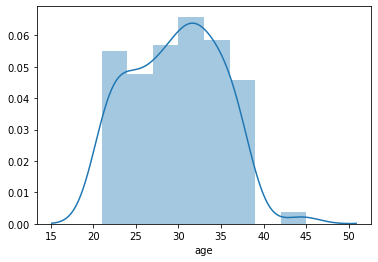

In [148]:
age = new_df["age"]
sns.distplot(age)
 
plt.show() 
#this shows that age is represented by relative amounts of people with each age.The majority of people will be middle-aged, with fewer young and very few old. 

In [149]:
#the code below helps me to analyse reltaionships between age and location (which I`ve already intepreted)

location_mean_age = new_df.groupby("location").age.mean() 
 
print(location_mean_age)
#this shows that people in urban area are relatively younger than in rural

location
rural    31.142857
urban    29.609195
Name: age, dtype: float64


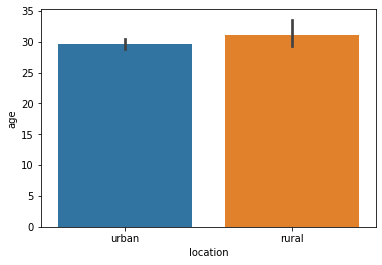

In [151]:
#let`s see vizulaization  
plt.close()
sns.barplot(
    data=new_df,
    x= "location",
    y= "age"
)
plt.show()